# Exploratory Data Analysis
---

In [1]:
# Imports
import os
import pandas as pd
from pandas_profiling import ProfileReport
import missingno as msno

In [2]:
# get parent directory: 
# https://www.geeksforgeeks.org/get-parent-of-current-directory-using-python/
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

# Find data folder
data_path = os.path.join(parent_dir, 'data')

# Try creating output folder, pass if
output_dir = os.path.join(parent_dir, 'output')

try:
    os.mkdir(output_dir)
except OSError as error:
    print('Folder for output exists')
    
files = [item for item in os.listdir(data_path) if not item.startswith('.')]

Folder for output exists


In [3]:
files

['census_doc.dta',
 'india_ag_extend_doc.dta',
 'india_pov_c81_updown_doc.dta',
 'india_pov_c81_updown_doc.dta.dta',
 'malaria_code81_doc.dta',
 'pubgoods.dta']

In [4]:
# open stata file:
# https://pandas.pydata.org/docs/reference/api/pandas.read_stata.html

file_path = '../data/' + 'malaria_code81_doc.dta'
df = pd.read_stata(file_path)

In [5]:
df.shape

(16463, 233)

In [29]:
cols_to_keep = ['year',
'elev1',
'elev2',
'elev3',
'elev4',
# 'sdistrict1',
# 'sdistrict2',
# 'sdistrict3',
# 'sdistrict4',
# 'sdistrict5',
# 'sdistrict6',
'km2',
'riverkm',
'dam',
# 'sriver1',
# 'sriver2',
# 'sriver3',
# 'sriver4',
# 'sriver5',
# 'sriver6',
'api',
'state',
'district']

In [30]:
df_sample = df[cols_to_keep].copy()

In [31]:
df_sample.shape

(16463, 11)

<Figure size 1152x1152 with 0 Axes>

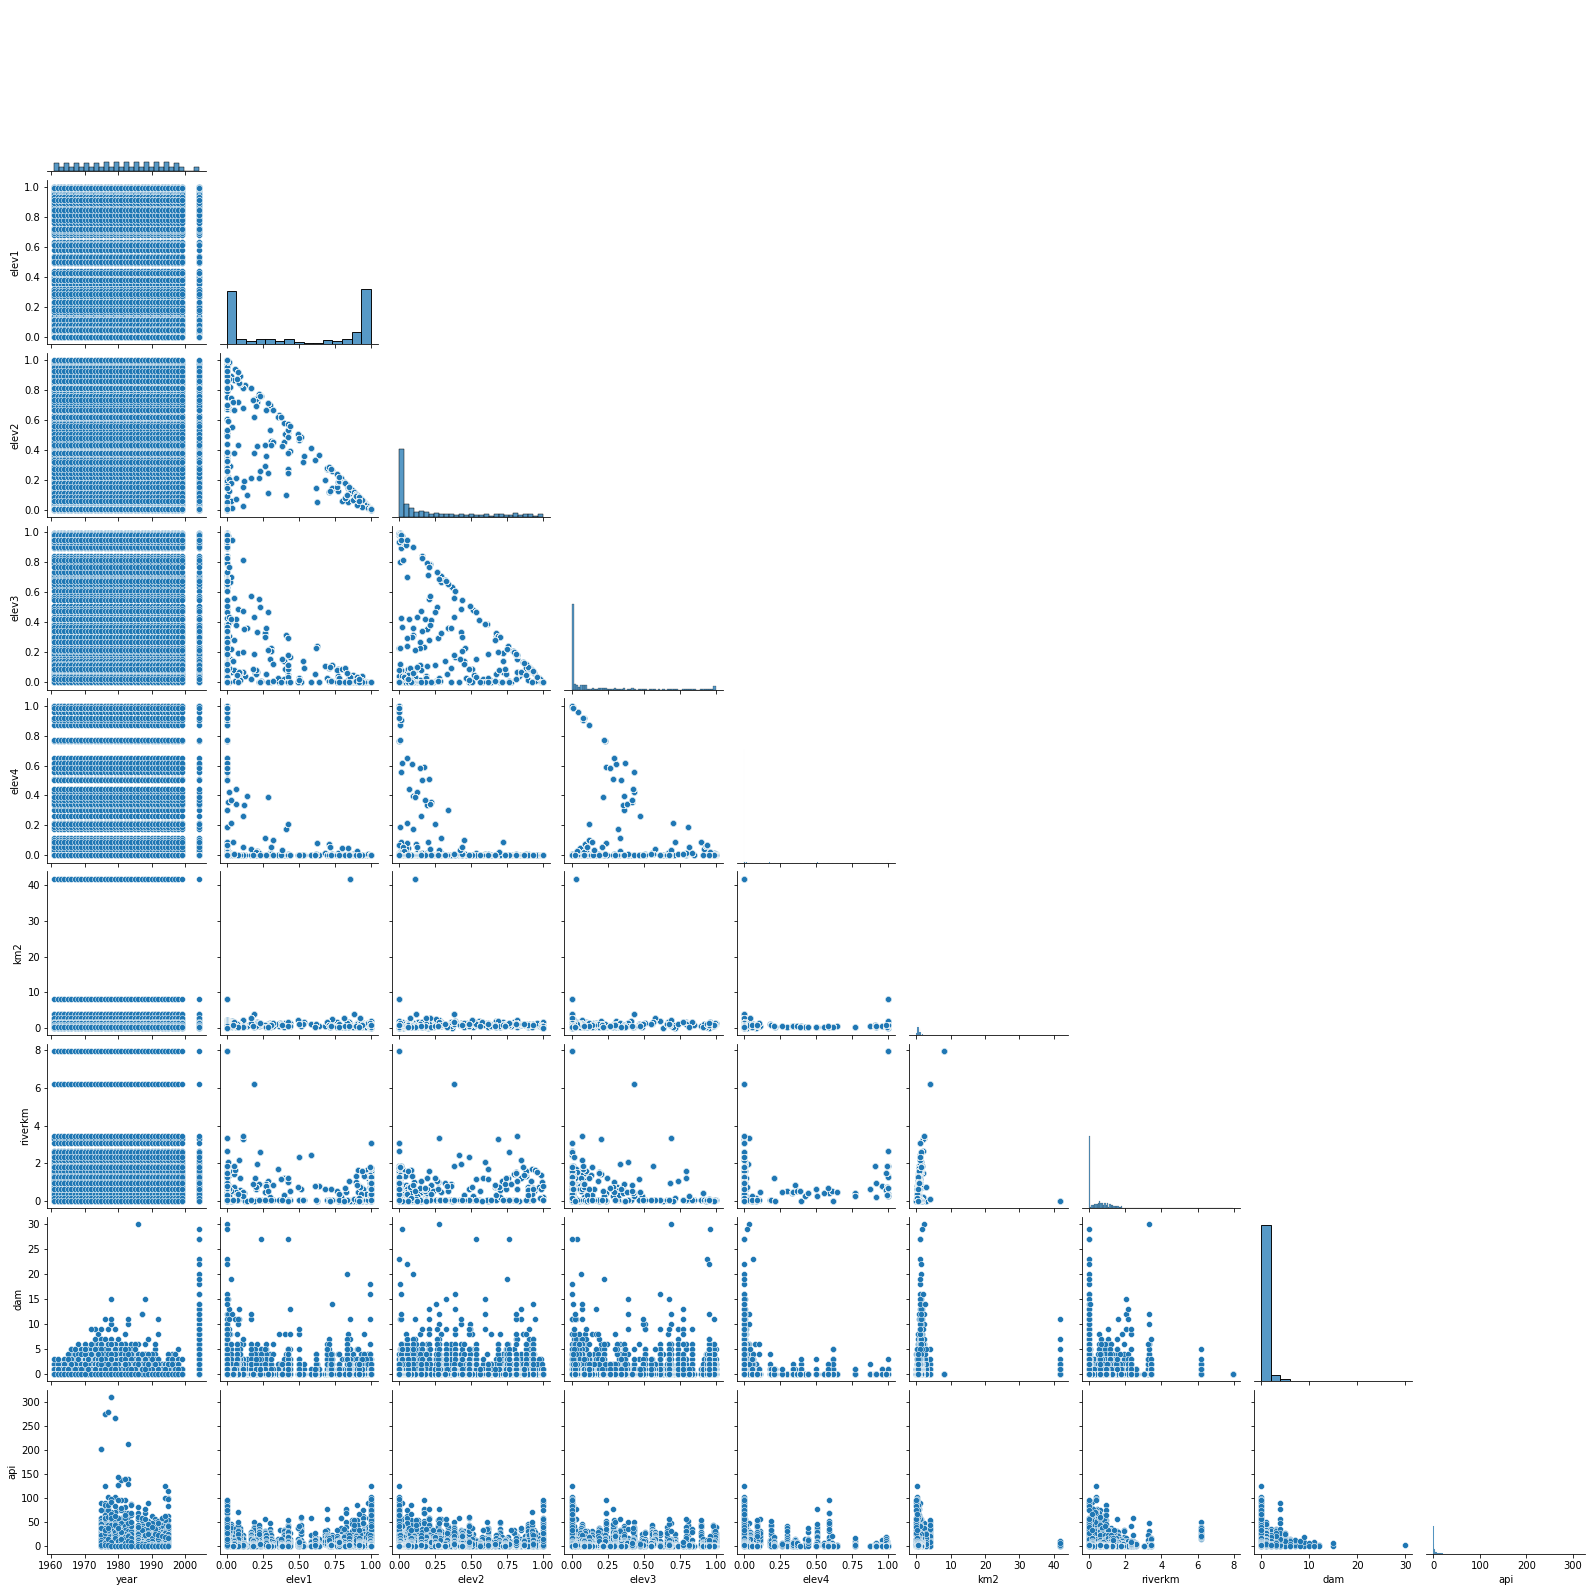

In [33]:
plt.figure(figsize=(16, 16));
sns.pairplot(df_sample, corner=True);

<AxesSubplot:>

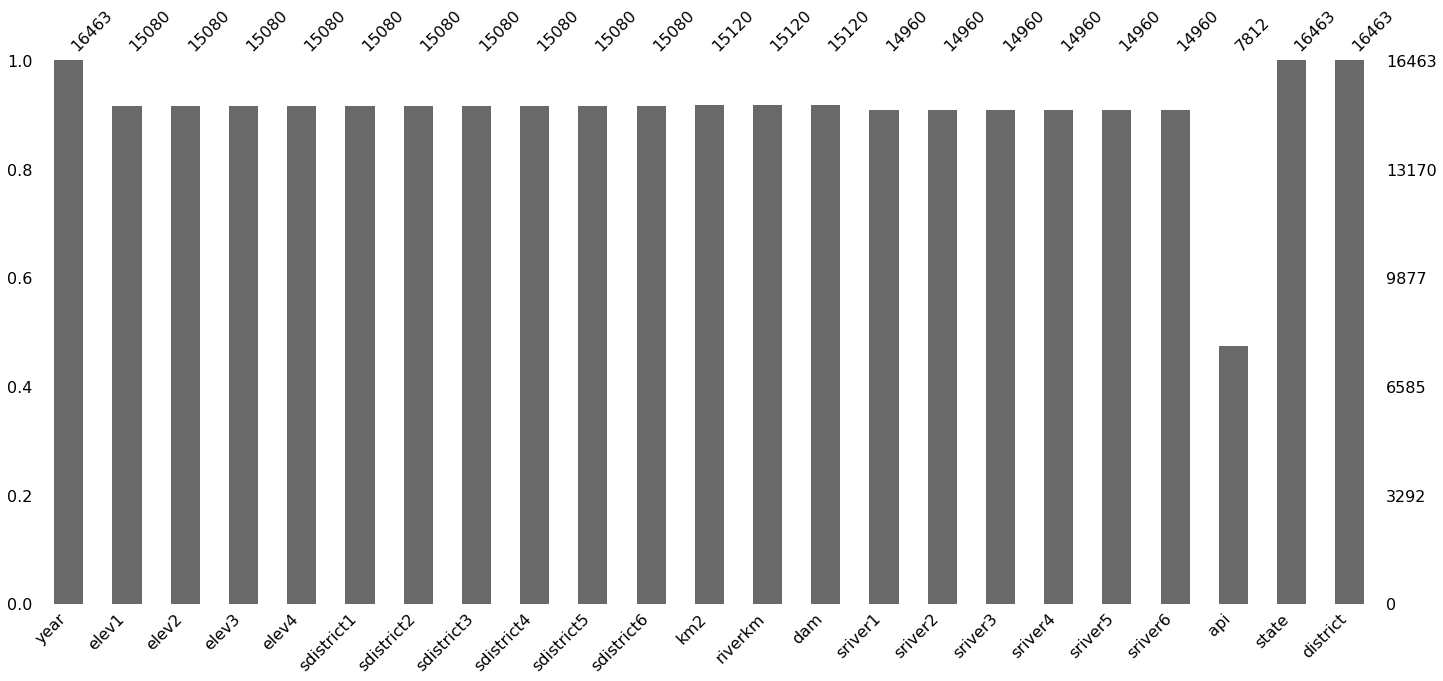

In [9]:
msno.bar(df_sample)

In [10]:
df_sample.isnull().sum()

year             0
elev1         1383
elev2         1383
elev3         1383
elev4         1383
sdistrict1    1383
sdistrict2    1383
sdistrict3    1383
sdistrict4    1383
sdistrict5    1383
sdistrict6    1383
km2           1343
riverkm       1343
dam           1343
sriver1       1503
sriver2       1503
sriver3       1503
sriver4       1503
sriver5       1503
sriver6       1503
api           8651
state            0
district         0
dtype: int64

In [11]:
# df_sample.district.unique()

array(['', 'SRIKAKAKULAM', 'VIZIANAGARAM', 'VISHAKHAPATNAM',
       'EAST GODAVARI', 'WEST GODAVARI', 'KRISHNA', 'GUNTUR', 'PRAKASAM',
       'NELLORE', 'MEHBOOBNAGAR', 'RANGAREDDY', 'HYDERABAD', 'MEDAK',
       'NIZAMABAD', 'ADILABAD', 'KARIMNAGAR', 'WARRANGAL', 'KHAMMAM',
       'NALGONDA', 'ANANTAPUR', 'KURNOOL', 'CHITTOR', 'CUDDAPAH',
       'WEST KAMENG', 'TAWANG', 'EAST KAMENG', 'LOWER SUBANSIRI',
       'UPPER SUBANSIRI', 'WEST SIANG', 'EAST SIANG', 'DIBANG VALLEY',
       'LOHIT', 'CHANGLANG', 'TIRAP', 'LAKHIMPUR', 'DHEMAJI', 'GOLAGHAT',
       'SIBSAGAR', 'JORHAT', 'TINSUKIA', 'DIBRUGARH', 'CACHAR',
       'HAILAKANDI', 'KARIMGANJ', 'BONGAIGAON', 'KOKRAJHAR', 'DHUBRI',
       'GOALPARA', 'BARPETA', 'NALBARI', 'KAMRUP', 'DARRANG', 'SONITPUR',
       'MARIGAON', 'NOWGAON', 'KARBIA ANGLONG', 'NORTH CACHAR HILLS',
       'DEOGARH', 'GODDA', 'SAHIBGANJ', 'DUMKA', 'DHANBAD', 'GIRIDIH',
       'HAZARIBAG', 'PALAMU', 'RANCHI', 'GUMLA', 'LOHARDAGA',
       'PURBISINGHBHUM', 'PASHCHIMSI

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='api', ylabel='riverkm'>

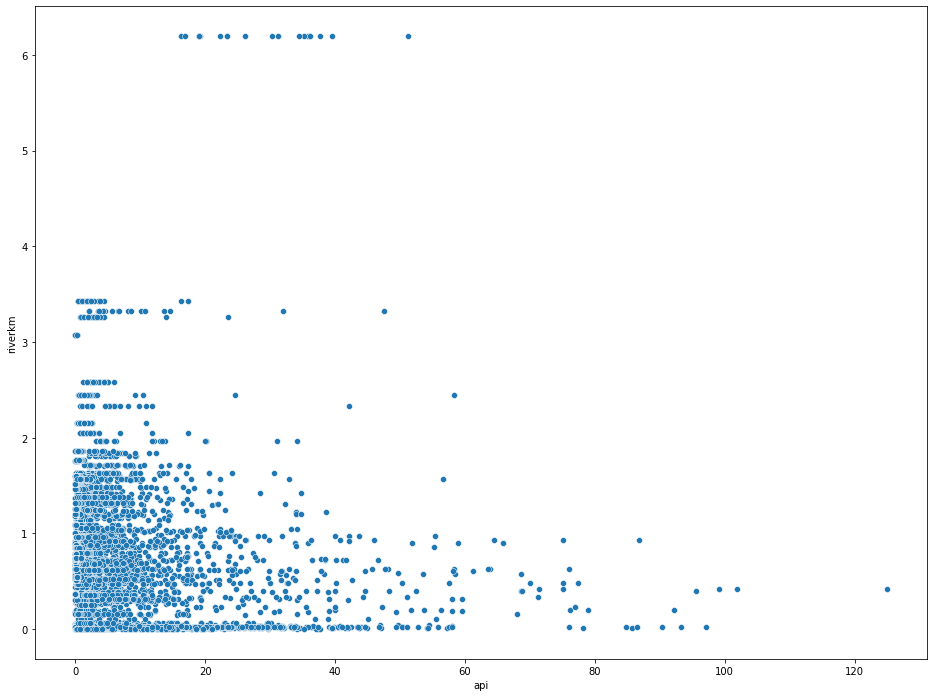

In [28]:
plt.figure(figsize=(16,12))
sns.scatterplot(x='api', y='riverkm', data=df_sample)

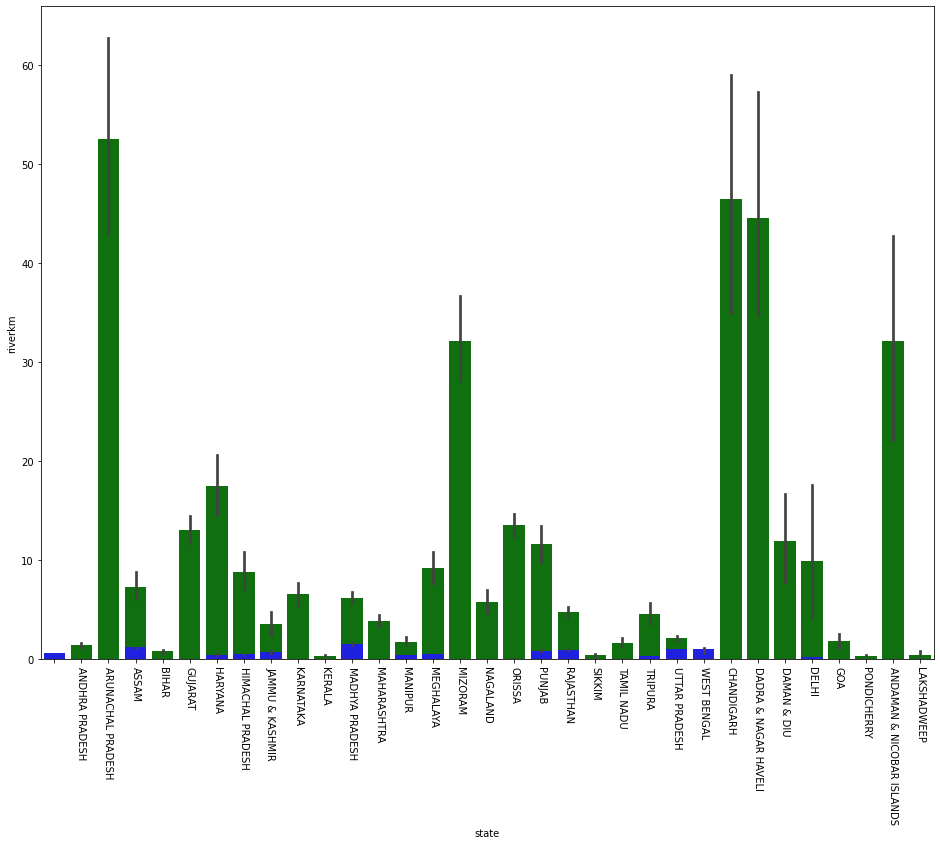

In [26]:
plt.figure(figsize=(16,12))
sns.barplot(x='state', y='api', data=df_sample, color='green')
sns.barplot(x='state', y='riverkm', data=df_sample, color='blue')
plt.xticks(rotation=-90);

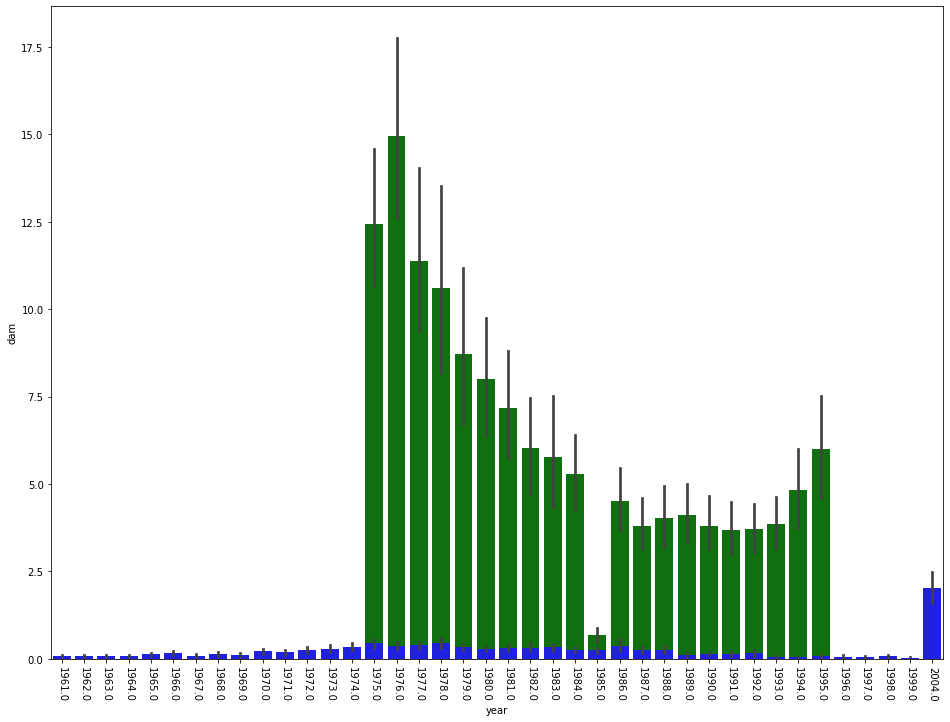

In [23]:
plt.figure(figsize=(16,12))
sns.barplot(x='year', y='api', data=df_sample, color='green')
sns.barplot(x='year', y='dam', data=df_sample, color='blue')
plt.xticks(rotation=-90);

In [12]:
# Sample 10,000 rows
#sample = df_sample.sample(5000)
ProfileReport(df_sample, minimal=True)

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
census_df = pd.read_stata('../data/census_doc.dta')

In [35]:
census_df.shape

(2712, 9)

In [39]:
census_df['year'].unique()

array([   6,    7,    8,    9, 1961, 1971, 1981, 1991], dtype=int16)

<Figure size 1152x1152 with 0 Axes>

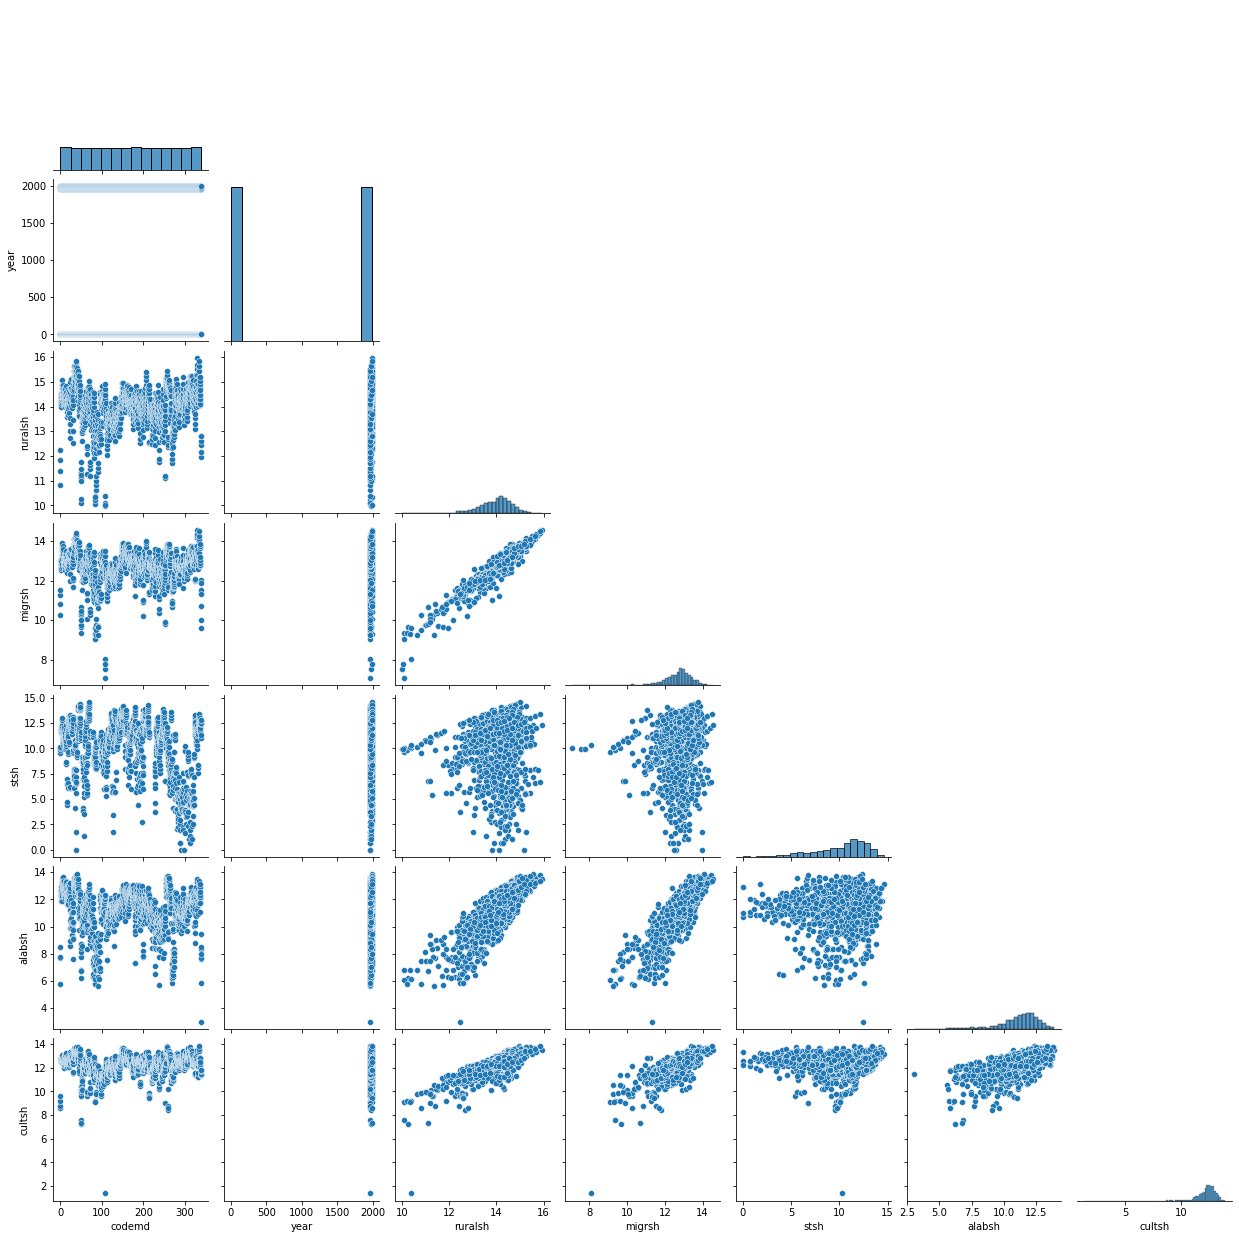

In [37]:
plt.figure(figsize=(16,16))
sns.pairplot(census_df, corner=True)

In [ ]:
for file in files:
    file_path = '../data/' + file
    df = pd.read_stata(file_path)
    print(file)
    print(df.shape)
    print(df.describeibe())